In [5]:
!pip install -q scikit-learn pandas streamlit openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00


In [6]:
import pandas as pd
import re
import datetime
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [7]:
file_path = "/content/resumes_indeed_com-job_sample.csv"

In [11]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
  file_path = filename
  break

Saving resumes_indeed_com-job_sample.csv to resumes_indeed_com-job_sample (3).csv


In [12]:
df = pd.read_csv(file_path)
df.head()

,Uniq Id,Crawl Timestamp,Resume Title,Location,Introduction,Work Experience,Education,Skills,Additional Information
0,3ddb29e616f31947053b257f327969d7,2019-02-20 08:47:25 +0000,Sales Manager,"New London, NH",Dynamic technical sales professional with dive...,"Sales Manager-MadgeTech, Inc-August 2015 to Fe...",B.A.-History-Franklin Pierce University-Rindge...,"120 months-CRM,72 months-Contract Negotiation,...",• Well-Developed Sales & Business Acumen ...
1,9138476c76bcbbefadedd4862966c3d2,2019-02-20 07:47:48 +0000,Implementation Engineer,"Worcester, MA","Experienced, dependable and motivated IT Techn...",Implementation Engineer-Versatile Communicatio...,"--ShoreTel University-Austin, TX|Master-PC & N...","15 months-CISCO,12 months-FIBER OPTIC,6 months...","TECHNICAL SKILLS\n\nHardware: Switches, Router..."
2,cd1cafa706f917a627982bf47291b888,2019-02-20 07:37:41 +0000,Education Information Dissemination Coordinator,"Bristol, NH",NaN,Education Information Dissemination Coordinato...,"Bachelor's-Management-Regis College-Weston, MA",NaN,NaN
3,53aea69598c6c1084e4bce89f0494bc3,2019-02-20 08:20:06 +0000,Engineering Department Intern,"Billerica, MA",To obtain full time employment in the field of...,Engineering Department Intern-Town of Billeric...,Bachelor of Science-Civil and Environmental En...,NaN,• Bachelors of Science in Civil and Environmen...
4,90f8f99d66ebc6c09fceee37aff14bc1,2019-02-20 08:35:33 +0000,Pack and Ship/SORT Technician,"Worcester, MA",NaN,Pack and Ship/SORT Technician-Intel Corporatio...,BS-Information Technology-University of Massac...,NaN,Engineering Technician/Planning Analyst/Operat...


In [16]:
def anonymize_resume(text):
  if pd.isna(text):
    return ""
  text = str(text) # Ensure it's string
  text = re.sub(r'\b[A-Z][a-z]+ [A-Z][a-z]+\b', "[ANONYMIZED]", text) # Full names
  text = re.sub(r'\b[A-Z][a-z]+\b', "[ANONYMIZED]", text) # First names
  return text

df['Anonymized_Resume'] = df['Work Experience'].apply(anonymize_resume)

In [17]:
job_description = input("Enter Job Description: ")

vectorizer = TfidfVectorizer()
resume_matrix = vectorizer.fit_transform(df['Anonymized_Resume'].fillna(""))
job_vector = vectorizer.transform([job_description])

df['Relevance_Score'] = cosine_similarity(resume_matrix, job_vector).flatten()
ranked_df = df[['Resume Title', 'Relevance_Score']].sort_values(by='Relevance_Score', ascending=False)

print("\nTop Candidates:\n", ranked_df.head(3))

Enter Job Description: Sales Manager

Top Candidates:
                  Resume Title  Relevance_Score
0               Sales Manager         0.095465
8   ASSISTANT PROGRAM MANAGER         0.024909
9  Technical Customer Service         0.023752


In [18]:
def schedule_interview(candidate_name):
  date = datetime.datetime.now() + datetime.timedelta(days=random.randint(1, 7))
  time = random.choice(["10:00 AM", "2:00 PM", "4:00 PM"])
  return candidate_name, date.strftime('%Y-%m-%d'), time

schedule_list = []

for name in ranked_df.head(3)['Resume Title']:
  scheduled = schedule_interview(name)
  schedule_list.append(scheduled)

schedule_df = pd.DataFrame(schedule_list, columns=["Candidate", "Interview Date", "Time Slot"])
print("\nInterview Schedule:\n")
print(schedule_df)


Interview Schedule:

                    Candidate Interview Date Time Slot
0               Sales Manager     2025-04-13  10:00 AM
1   ASSISTANT PROGRAM MANAGER     2025-04-12   2:00 PM
2  Technical Customer Service     2025-04-11  10:00 AM


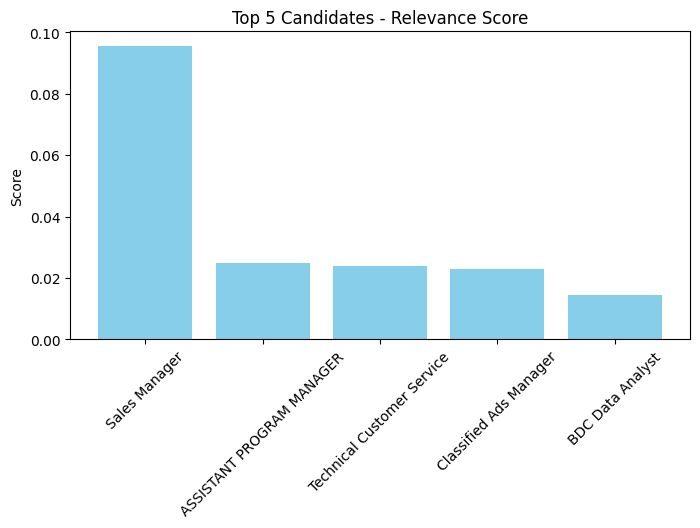

In [19]:
plt.figure(figsize=(8,4))
plt.bar(ranked_df['Resume Title'][:5], ranked_df['Relevance_Score'][:5], color='skyblue')
plt.title("Top 5 Candidates - Relevance Score")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.show()

In [20]:
ranked_df.to_csv("Ranked_Candidates.csv", index=False)
schedule_df.to_csv("Interview_Schedule.csv", index=False)
files.download("Ranked_Candidates.csv")
files.download("Interview_Schedule.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>